## Exploratory Data Analysis (EDA)

In [1]:
import yaml

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    with open('../config.yaml') as file:
        config = yaml.safe_load(file)
except:
    print("Yaml file not found.")

### 1. Load Datasets

### 1.1 Judicial Autonomy index and macro-indicators subset & V-Dem ERT dataset

In [19]:
# Load merged datasets
q1_index_macro_vdem = pd.read_csv(config['output_data']['q1_output_index_macro_vdem'])
q1_index_macro_vdem = q1_index_macro_vdem.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
q1_index_macro_vdem.head()

,country,year,country_year,index_measure,q1_macro_appointment_procedures_ind_measure,q1_macro_selection_criteria_ind_measure,q1_macro_professional_rights_ind_measure,q1_macro_professional_obligations_ind_measure,q1_macro_judicial_administration_ind_measure,reg_id,reg_type,v2x_regime,v2x_polyarchy,reg_trans,row_regch_event,dem_ep
0,Albania,2000,Albania_2000,0.52,0.55,0.5,0.42,0.65,0.5,ALB_1914_2004,0.0,1.0,0.407,0.0,0.0,1
1,Albania,2001,Albania_2001,0.52,0.55,0.5,0.42,0.65,0.5,ALB_1914_2004,0.0,1.0,0.440,0.0,0.0,1
2,Albania,2002,Albania_2002,0.52,0.55,0.5,0.42,0.65,0.5,ALB_1914_2004,0.0,1.0,0.484,0.0,0.0,1
3,Albania,2003,Albania_2003,0.52,0.55,0.5,0.42,0.65,0.5,ALB_1914_2004,0.0,1.0,0.490,0.0,0.0,1
4,Albania,2004,Albania_2004,0.55,0.55,0.5,0.42,0.76,0.5,ALB_1914_2004,0.0,1.0,0.490,0.0,0.0,1


In [30]:
# Check datatypes
q1_index_macro_vdem.dtypes

country                                           object
year                                               int64
country_year                                      object
index_measure                                    float64
q1_macro_appointment_procedures_ind_measure      float64
q1_macro_selection_criteria_ind_measure          float64
q1_macro_professional_rights_ind_measure         float64
q1_macro_professional_obligations_ind_measure    float64
q1_macro_judicial_administration_ind_measure     float64
reg_id                                            object
reg_type                                         float64
v2x_regime                                       float64
v2x_polyarchy                                    float64
reg_trans                                        float64
row_regch_event                                  float64
dem_ep                                             int64
dtype: object

In [31]:
# Change datatypes
q1_index_macro_vdem = q1_index_macro_vdem.astype({'reg_type': 'int', 'v2x_regime': 'int'})

### 1.2 Judicial Autonomy index, macro- and micro-indicators subset & V-Dem ERT dataset

In [21]:
# Load merged datasets
q1_index_macro_micro_vdem = pd.read_csv(config['output_data']['q1_output_index_macro_micro_vdem'])
q1_index_macro_micro_vdem = q1_index_macro_micro_vdem.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
#q1_index_macro_micro_vdem.head()

### 2. EDA -- Judicial Autonomy Index

In [25]:
q1_index_macro_vdem[['index_measure','v2x_polyarchy']].describe()

,index_measure,v2x_polyarchy
count,920.000000,920.000000
mean,0.708848,0.730189
std,0.131947,0.197704
min,0.290000,0.186000
25%,0.620000,0.593000
50%,0.710000,0.837500
75%,0.802500,0.882250
max,0.960000,0.919000


In [40]:
# 
q1_index_macro_vdem.groupby('v2x_regime')['index_measure'].describe()

,count,mean,std,min,25%,50%,75%,max
v2x_regime,,,,,,,,
1,147.0,0.631497,0.159143,0.29,0.55,0.62,0.76,0.95
2,268.0,0.728582,0.121933,0.51,0.63,0.74,0.83,0.96
3,505.0,0.720891,0.120146,0.38,0.65,0.72,0.82,0.91


In [38]:
q1_index_macro_vdem.groupby('v2x_regime')['v2x_polyarchy'].describe()

,count,mean,std,min,25%,50%,75%,max
v2x_regime,,,,,,,,
1,147.0,0.363959,0.094898,0.186,0.2895,0.3780,0.44850,0.497
2,268.0,0.666291,0.107873,0.501,0.5655,0.6575,0.77425,0.855
3,505.0,0.870705,0.037730,0.595,0.8570,0.8770,0.89300,0.919


### 3. EDA -- V-Dem ERT (Regime Type / categorical)

In [107]:
# Frequency table for V-Dem Regime Type

frequency_table = q1_index_macro_vdem['v2x_regime'].value_counts()
frequency_table = frequency_table.rename(index={1: 'Electoral Autocracy', 2: 'Electoral Democracy', 3: 'Liberal Democracy'})
frequency_table

v2x_regime
Liberal Democracy      505
Electoral Democracy    268
Electoral Autocracy    147
Name: count, dtype: int64

In [111]:
# Proportion table for V-Dem Regime Type (in percentage)

proportion_table = q1_index_macro_vdem['v2x_regime'].value_counts(normalize=True)*100
proportion_table = proportion_table.rename(index={1: 'Electoral Autocracy', 2: 'Electoral Democracy', 3: 'Liberal Democracy'})
proportion_table

v2x_regime
Liberal Democracy      54.891304
Electoral Democracy    29.130435
Electoral Autocracy    15.978261
Name: proportion, dtype: float64

In [112]:
### DELETE - redundant ### 

# Crosstab tables for V-Dem Regime Type

crosstab_table = pd.crosstab(index = q1_index_macro_vdem["v2x_regime"], columns="count")
crosstab_table = crosstab_table.rename(index={1: 'Electoral Autocracy', 2: 'Electoral Democracy', 3: 'Liberal Democracy'})

crosstab_table_propo = (crosstab_table/crosstab_table.sum()).round(2)

display(crosstab_table) 
display(crosstab_table_propo)

col_0,count
v2x_regime,
Electoral Autocracy,147
Electoral Democracy,268
Liberal Democracy,505


col_0,count
v2x_regime,
Electoral Autocracy,0.16
Electoral Democracy,0.29
Liberal Democracy,0.55


#### 3.1 Frequency of V-Dem Regime Types for all years

In [104]:
### FIX labels and legend!!! #### 

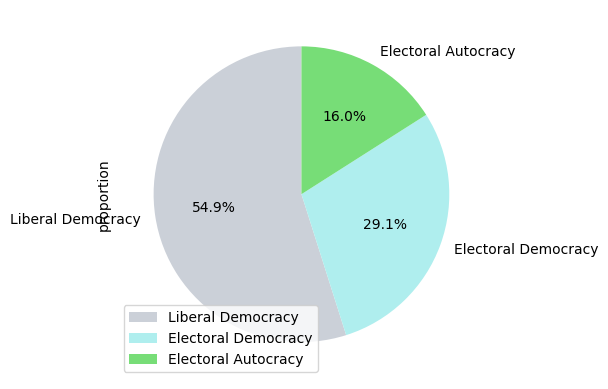

In [102]:
# Pie chart for V-Dem Regime Type (total number of observations across all years)

colors = ['#cbd0d8', '#afeeee', '#77dd77']

proportion_table.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.legend(title='');

#### 3.2 Frequency of V-Dem Regime Types per year

In [95]:
# Frequency table for V-Dem Regime Types per year

# Create frequency table
frequency_table_year_regimetype = q1_index_macro_vdem.groupby('year')['v2x_regime'].value_counts().unstack()

# Renaming Regime Types (to 1: 'Electoral Autocracy', 2: 'Electoral Democracy', 3: 'Liberal Democracy')
frequency_table_year_regimetype = frequency_table_year_regimetype.rename(columns={1: 'Electoral Autocracy', 2: 'Electoral Democracy', 3: 'Liberal Democracy'})

# Display dataframe
frequency_table_year_regimetype

v2x_regime,Electoral Autocracy,Electoral Democracy,Liberal Democracy
year,,,
2000,9,9,22
2001,8,10,22
2002,7,11,22
2003,7,11,22
2004,5,12,23
2005,5,12,23
2006,4,13,23
2007,5,11,24
2008,6,10,24


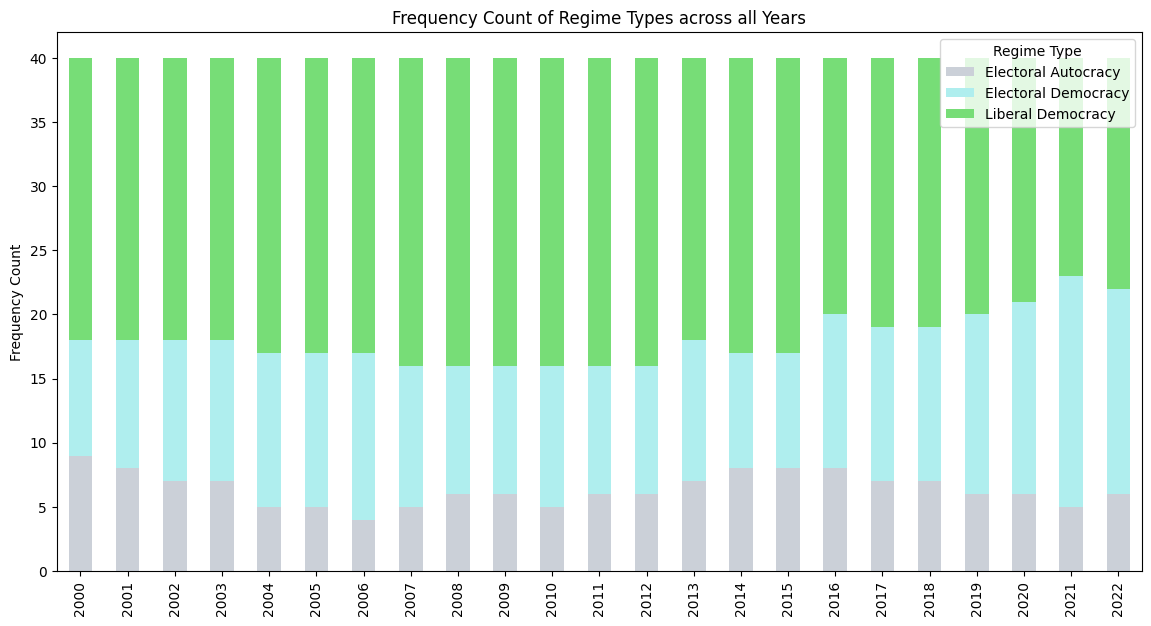

In [103]:
# Stacked Barplot for V-Dem Regime Types per year

colors = ['#cbd0d8', '#afeeee', '#77dd77']

frequency_table_year_regimetype.plot(kind='bar', stacked=True, color=colors, figsize=(14, 7))

plt.title('Frequency Count of Regime Types across all Years')
plt.xlabel('')
plt.ylabel('Frequency Count')
plt.legend(title='Regime Type')

plt.savefig("../figures/regime_types_all_years_stacked_barplots.jpeg", format="jpeg", dpi=300)
plt.show()